# Persistence and Performance

- **Business Continuity** : Ensures your data survives system restarts
- **Cost Effectiveness** : Avoid recomputing embeddings
- **Horizontal Scaling** : Enables distributed architectures

In [1]:
import os
import chromadb
from chromadb.utils import embedding_functions
import time
import numpy as np

In [3]:
print("=== PERSISTENT STORAGE ===")
# Set up the storage path with error handling
db_path = "./chroma_db"
os.makedirs(db_path, exist_ok=True) # Create directory if it doesn't exist

# Initialize a persistent client that stores data on disk
print("Creating a persistent Chroma client...")
client = chromadb.PersistentClient(path=db_path)

# Create an embedding function using the SentenceTransformer model
embedding_function = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-MiniLM-L6-v2")

=== PERSISTENT STORAGE ===
Creating a persistent Chroma client...


In [4]:
# Helper function to display query results in a readable format
def display_results(results):
    print("Results :")
    for i, (doc, doc_id, metadata, distance) in enumerate(zip(
        results['documents'][0],
        results['ids'][0],
        results['metadatas'][0],
        results['distances'][0]
    )):
        print(f"{i+1}. Document : {doc}")
        print(f"   ID : {doc_id}")
        print(f"   Metadata : {metadata}")
        print(f"   Distance : {distance}")
        print()

## Creating and Using a Persistent Collection

In [5]:
# Create a new collection with embedding function
print("Creating collection...")
collection = client.create_collection(name="persistent_docs", embedding_function=embedding_function)

# Sample documents about data persistence
documents = [
    "This is a document that will be stored persistently",
    "Vector databases need to persist data for production use",
    "Data persistence ensures your embeddings survive restarts"
]

# Add documents with unique IDs
ids = ["pdoc1", "pdoc2", "pdoc3"]
collection.add(documents=documents, ids=ids)

# Query the collection to verify it works
results = collection.query(query_texts=["persistent data storage"], n_results=1)

Creating collection...


In [6]:
display_results(results)

Results :
1. Document : This is a document that will be stored persistently
   ID : pdoc1
   Metadata : None
   Distance : 0.39227044582366943



## Performance 

When working with vector databases in production, performance becomes critical for several reasons :

- **User Experience** : Slow query responses lead to poor user experiences
- **Resource Utilization** : Inefficient operations consume excessive computational resources
- **Scaling Challenges** : Performance problems compound as data grows
- **Cost Implications** : In cloud environments, inefficient operations directly impact costs

In [7]:
print("\n=== PERFORMANCE CONSIDERATIONS ===")

# Create a separate collection for performance testing
collection_1 = client.create_collection(name="performance_test", embedding_function=embedding_function)

# Generate 1000 synthetic documents using random combinations of AI-related words
print("Generating synthetic documents for performance testing...")
words = ["AI", "machine", "learning", "vector", "database", "embedding", "neural",
         "network", "transformer", "data", "science", "engineering", "model",
         "algorithm", "optimization", "natural", "language", "processing"]

num_docs = 1000
documents = []

for i in range(num_docs):
    # Create a random document of 10-20 words
    doc_len = np.random.randint(10, 20)
    doc = " ".join(np.random.choice(words, size=doc_len))
    documents.append(doc)
    
ids = [f"perf_doc_{i}" for i in range(num_docs)]

# Measure time to add documents in batches
print(f"Adding {num_docs} documents to collection...")
start_time = time.time()

# Process in batches of 100 for better performance
batch_size = 100
for i in range(0, num_docs, batch_size):
    end_idx = min(i + batch_size, num_docs)
    collection_1.add(documents=documents[i:end_idx], ids=ids[i:end_idx])

add_time = time.time() - start_time
print(f"Time to add {num_docs} documents : {add_time:.2f} seconds")
print()

# Measure query performance across multiple queries
print("Testing query performance...")
query_times = []
num_queries = 5

for i in range(num_queries):
    # Generate a random 5-word query
    query = " ".join(np.random.choice(words, size=5))
    start_time = time.time()
    collection_1.query(query_texts=[query], n_results=10)
    query_time = time.time() - start_time
    query_times.append(query_time)
    print(f"Query {i+1} : {query_time:.4f} seconds")

print(f"Average query time : {np.mean(query_times):.4f} seconds")


=== PERFORMANCE CONSIDERATIONS ===
Generating synthetic documents for performance testing...
Adding 1000 documents to collection...
Time to add 1000 documents : 1.48 seconds

Testing query performance...
Query 1 : 0.0132 seconds
Query 2 : 0.0149 seconds
Query 3 : 0.0144 seconds
Query 4 : 0.0134 seconds
Query 5 : 0.0118 seconds
Average query time : 0.0135 seconds


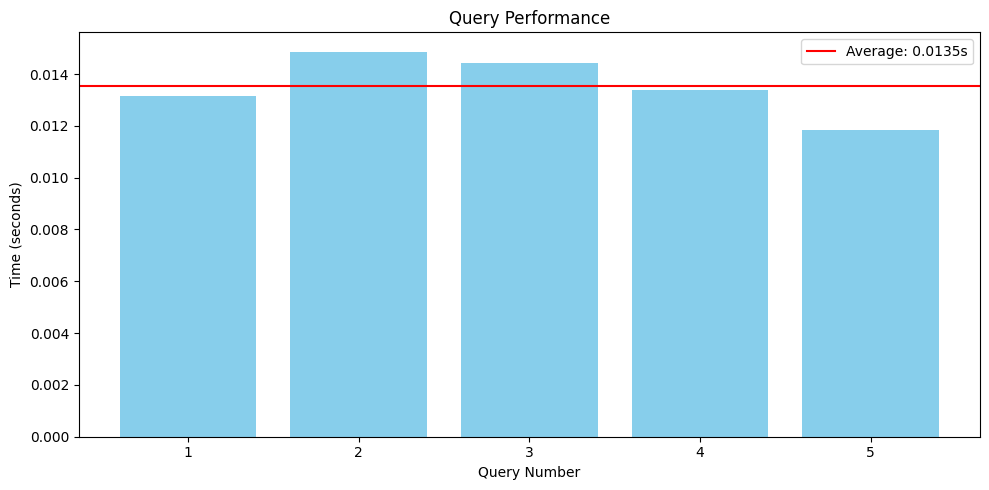

In [12]:
# Visualizing query performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, num_queries + 1), query_times, color="skyblue")
plt.axhline(y=np.mean(query_times), color="r", linestyle="-", label=f"Average: {np.mean(query_times):.4f}s")
plt.xlabel("Query Number")
plt.ylabel("Time (seconds)")
plt.title("Query Performance")
plt.legend()
plt.tight_layout()
plt.show()